# Cleaning US census Data

In [346]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as pyplot

## Compile the Data

***
Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [347]:
census_files = glob.glob("states*.csv")

file_list = []
for filename in census_files:
    data = pd.read_csv(filename)
    file_list.append(data)

census_files

['states8.csv',
 'states9.csv',
 'states4.csv',
 'states5.csv',
 'states7.csv',
 'states6.csv',
 'states2.csv',
 'states3.csv',
 'states1.csv']

## Inital view of the Data

In [348]:
us_census = pd.concat(file_list)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,$59125.270833333336,510388M_543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,$46296.807763401106,2322409M_2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,$51805.40540540541,423477M_419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,$47328.083616587355,3167756M_3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,$55874.522600500095,13171316M_13367298F


Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [349]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [350]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

Start to make a plan for how to convert these columns into the right types for manipulation.  

Regex to the Rescue  

Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

## Remove the currency sign and change Data type to numeric

In [351]:
us_census.Income = us_census.Income.replace('[\$]', '', regex=True)
us_census.Income.head()

0    59125.270833333336
1    46296.807763401106
2     51805.40540540541
3    47328.083616587355
4    55874.522600500095
Name: Income, dtype: object

Look at the PopulationGender column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

## Seperate Male and Female figures using .split()

In [352]:
population_split = us_census.GenderPop.str.split("_")
population_split.head()

0        [510388M, 543273F]
1      [2322409M, 2455167F]
2        [423477M, 419713F]
3      [3167756M, 3331859F]
4    [13171316M, 13367298F]
Name: GenderPop, dtype: object

In [353]:
us_census['male_population'] = population_split.str.get(0)
us_census['female_population'] = population_split.str.get(1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316M_13367298F,13171316M,13367298F


There is still an M or an F character in each entry! We should remove those before we convert to numeric data types.

In [354]:
pop_split = pd.DataFrame() # Create a temp empty df
pop_split['male_pop'] = us_census.male_population.str[0:-1]
pop_split['female_pop'] = us_census.female_population.str[0:-1]
pop_split.head()

,male_pop,female_pop
0,510388,543273
1,2322409,2455167
2,423477,419713
3,3167756,3331859
4,13171316,13367298


In [355]:
us_census = pd.concat([us_census, pop_split], axis = 1)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,male_population,female_population,male_pop,female_pop
0,0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F,510388M,543273F,510388,543273
1,1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409M_2455167F,2322409M,2455167F,2322409,2455167
2,2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477M_419713F,423477M,419713F,423477,419713
3,3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756M_3331859F,3167756M,3331859F,3167756,3331859
4,4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316M_13367298F,13171316M,13367298F,13171316,13367298


## Sort out the Columns we want and rename a couple

In [356]:
# Gather the columns we want into the df
us_census = us_census[['State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'male_pop', 'female_pop',]]
# Rename the male and female population columns
us_census.columns = ['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'male_population', 'female_population']
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388,543273
1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409,2455167
2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477,419713
3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756,3331859
4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316,13367298


## Convert Data Types

Convert both of the columns into numerical datatypes.



In [357]:
us_census.male_population = pd.to_numeric(us_census.male_population)
us_census.female_population = pd.to_numeric(us_census.female_population)
us_census.dtypes

State                 object
TotalPop               int64
Hispanic              object
White                 object
Black                 object
Native                object
Asian                 object
Pacific               object
Income                object
male_population        int64
female_population    float64
dtype: object

Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!


## Make a scatter plot graph

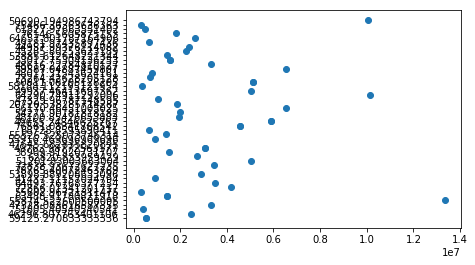

In [358]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()

## Check for NaN values (Not a Number)

Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

In [359]:
us_census.female_population.head(15)

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0           NaN
1     3455936.0
2     5038598.0
Name: female_population, dtype: float64

In [360]:
fem_pop_nan = us_census.female_population.isnull()
fem_pop_nan.head(15)

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
Name: female_population, dtype: bool

In [361]:
fem_pop_nan.value_counts()

False    51
True      3
Name: female_population, dtype: int64

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

## Work out the best way to fill the NaN values

In [362]:
example_nan = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan.iloc[12]

TotalPop             5930538.0
male_population      2872643.0
female_population          NaN
Name: 0, dtype: float64

In [363]:
nan_value = us_census.TotalPop - us_census.male_population


## Double check we got the expected result

In [364]:
us_census.female_population = us_census.female_population.fillna(value=nan_value)
example_nan_fixed = us_census[['TotalPop', 'male_population', 'female_population']]
example_nan_fixed.iloc[12]

TotalPop             5930538.0
male_population      2872643.0
female_population    3057895.0
Name: 0, dtype: float64

In [365]:
us_census.female_population.head(15)

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
Name: female_population, dtype: float64

We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

## Check for duplicates

In [366]:
duplicates = us_census.duplicated()
duplicates.value_counts()

False    46
True      8
dtype: int64

## Drop Dulicate entries

Drop those duplicates using the .drop_duplicates() function.

In [367]:
us_census = us_census.drop_duplicates()
duplicates_check = us_census.duplicated()
duplicates_check.value_counts()

False    46
dtype: int64

Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

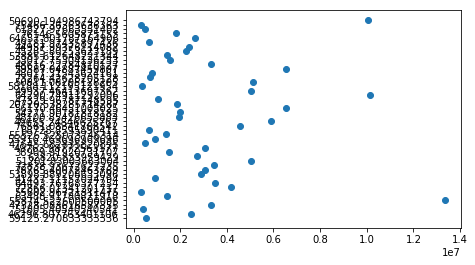

In [368]:
pyplot.scatter(us_census.female_population, us_census.Income) 
pyplot.show()

Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [369]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'male_population', 'female_population'],
      dtype='object')

Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

In [370]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388,543273.0
1,South Carolina,4777576,5.056684981684991%,62.888736263736185%,28.75091575091577%,0.2923992673992673%,1.249175824175822%,0.046978021978021964%,46296.807763401106,2322409,2455167.0
2,South Dakota,843190,3.2396396396396376%,82.50090090090092%,1.4238738738738752%,9.417567567567566%,1.0193693693693688%,0.04189189189189189%,51805.40540540541,423477,419713.0
3,Tennessee,6499615,4.720026972353339%,73.49008766014822%,18.283816587997297%,0.22663519892110592%,1.4072825354012126%,0.04315576534052599%,47328.083616587355,3167756,3331859.0
4,Texas,26538614,38.04673809068304%,44.687908934379145%,11.65004782858236%,0.26114405969007126%,3.6696958102161825%,0.06881576430074614%,55874.522600500095,13171316,13367298.0


## Remove % sign and change data types

In [371]:
us_census.Hispanic = us_census.Hispanic.replace('[\%]', '', regex=True)
us_census.White = us_census.White.replace('[\%]', '', regex=True)
us_census.Black = us_census.Black.replace('[\%]', '', regex=True)
us_census.Native = us_census.Native.replace('[\%]', '', regex=True)
us_census.Asian = us_census.Asian.replace('[\%]', '', regex=True)
us_census.Pacific = us_census.Pacific.replace('[\%]', '', regex=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Rhode Island,1053661,13.356666666666678,74.32541666666665,5.68291666666667,0.3462500000000001,3.2474999999999983,0.035833333333333335,59125.270833333336,510388,543273.0
1,South Carolina,4777576,5.056684981684991,62.888736263736185,28.75091575091577,0.2923992673992673,1.249175824175822,0.046978021978021964,46296.807763401106,2322409,2455167.0
2,South Dakota,843190,3.2396396396396376,82.50090090090092,1.4238738738738752,9.417567567567566,1.0193693693693688,0.04189189189189189,51805.40540540541,423477,419713.0
3,Tennessee,6499615,4.720026972353339,73.49008766014822,18.283816587997297,0.22663519892110592,1.4072825354012126,0.04315576534052599,47328.083616587355,3167756,3331859.0
4,Texas,26538614,38.04673809068304,44.687908934379145,11.65004782858236,0.26114405969007126,3.6696958102161825,0.06881576430074614,55874.522600500095,13171316,13367298.0


In [372]:
us_census.Hispanic = pd.to_numeric(us_census.Hispanic)
us_census.White = pd.to_numeric(us_census.White)
us_census.Black = pd.to_numeric(us_census.Black)
us_census.Native = pd.to_numeric(us_census.Native)
us_census.Asian = pd.to_numeric(us_census.Asian)
us_census.Pacific = pd.to_numeric(us_census.Pacific)
us_census.dtypes

State                 object
TotalPop               int64
Hispanic             float64
White                float64
Black                float64
Native               float64
Asian                float64
Pacific              float64
Income                object
male_population        int64
female_population    float64
dtype: object

## Check for NaN values

In [373]:
Hnan = us_census.Hispanic.isnull()
Wnan = us_census.White.isnull()
Bnan = us_census.Black.isnull()
Nnan = us_census.Native.isnull()
Anan = us_census.Asian.isnull()
Pnan = us_census.Pacific.isnull()
    

In [374]:
Hnan.value_counts()

False    46
Name: Hispanic, dtype: int64

In [375]:
Wnan.value_counts()

False    46
Name: White, dtype: int64

In [376]:
Bnan.value_counts()

False    46
Name: Black, dtype: int64

In [377]:
Nnan.value_counts()

False    46
Name: Native, dtype: int64

In [378]:
Anan.value_counts()

False    46
Name: Asian, dtype: int64

In [379]:
Pnan.value_counts() # has 4 nan values we need to get rid of

False    42
True      4
Name: Pacific, dtype: int64

## Work out the best way to replace the NaN values

We should be able to find the missing percentage as we have the others and they should all add up to 100%

In [380]:
# nan_value = 100 -(us_census.Hispanic + us_census.White + us_census.Black + us_census.Native + us_census.Asian)
# us_census.Pacific = us_census.Pacific.fillna(value=nan_value)
# us_census.Pacific

# After having checked, the mean value of the column seems more realistic.

```0    0.035833
1    0.046978
2    0.041892
3    0.043156
4    0.068816
5    0.825983
1    0.030601
2    0.064715
3    0.609896
4    0.026446
5    0.020833
0    0.036285
1    0.019809
2    0.019549
3    0.032909
4    0.015046
5    0.101657
1    0.072222
2    0.057143
3    0.574521
4    0.016096
5    0.031319
0    0.022645
1    0.106220
2    0.345333
3    0.019394
4    0.001240
1    0.042771
2    0.023451
3    0.052326
4    1.821463
0    0.046602
1    8.758861
2    0.127181
3    0.020032
4    0.032625
5    0.055164
1    2.764474
2    0.046438
3    0.039184
4    0.015670
0    2.537842
1    0.018599
2    2.270093
3    0.029609
4    0.051510
Name: Pacific, dtype: float64```

In [381]:
nan_value = us_census.Pacific.mean()
us_census.Pacific = us_census.Pacific.fillna(value=nan_value)

In [382]:
us_census.Pacific

0    0.035833
1    0.046978
2    0.041892
3    0.043156
4    0.068816
5    0.825983
1    0.030601
2    0.064715
3    0.609896
4    0.026446
5    0.020833
0    0.036285
1    0.019809
2    0.019549
3    0.032909
4    0.015046
5    0.101657
1    0.072222
2    0.057143
3    0.574521
4    0.016096
5    0.031319
0    0.022645
1    0.106220
2    0.345333
3    0.019394
4    0.001240
1    0.042771
2    0.023451
3    0.052326
4    0.301109
0    0.046602
1    8.758861
2    0.127181
3    0.020032
4    0.032625
5    0.055164
1    0.301109
2    0.046438
3    0.039184
4    0.015670
0    0.301109
1    0.018599
2    0.301109
3    0.029609
4    0.051510
Name: Pacific, dtype: float64

In [391]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,male_population,female_population
0,Rhode Island,1053661,13.356667,74.325417,5.682917,0.346250,3.247500,0.035833,59125.270833333336,510388,543273.0
1,South Carolina,4777576,5.056685,62.888736,28.750916,0.292399,1.249176,0.046978,46296.807763401106,2322409,2455167.0
2,South Dakota,843190,3.239640,82.500901,1.423874,9.417568,1.019369,0.041892,51805.40540540541,423477,419713.0
3,Tennessee,6499615,4.720027,73.490088,18.283817,0.226635,1.407283,0.043156,47328.083616587355,3167756,3331859.0
4,Texas,26538614,38.046738,44.687909,11.650048,0.261144,3.669696,0.068816,55874.522600500095,13171316,13367298.0


## Plot Histograms 

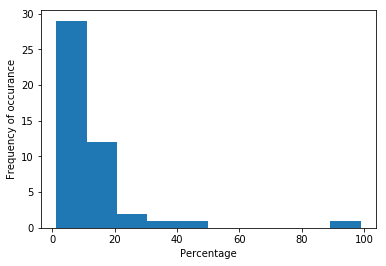

In [384]:
pyplot.hist(us_census.Hispanic)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

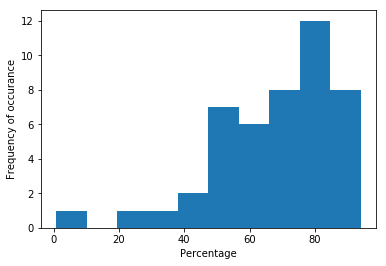

In [385]:
pyplot.hist(us_census.White)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

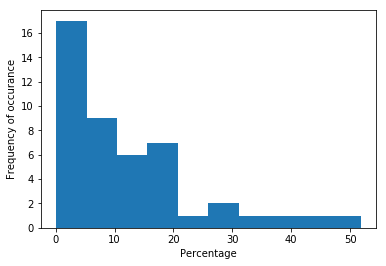

In [386]:
pyplot.hist(us_census.Black)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

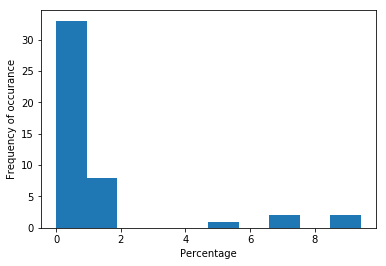

In [387]:
pyplot.hist(us_census.Native)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

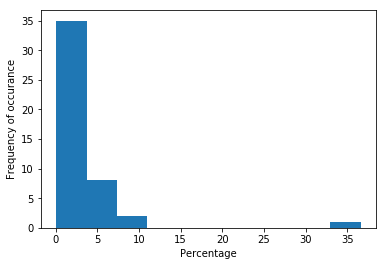

In [388]:
pyplot.hist(us_census.Asian)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()

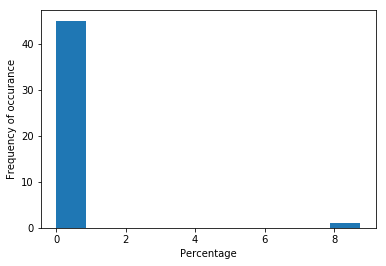

In [389]:
pyplot.hist(us_census.Pacific)
pyplot.xlabel('Percentage')
pyplot.ylabel('Frequency of occurance')
pyplot.show()